In [2]:
import ios
import numpy as np
import matplotlib.pyplot as plt
plainseq = ios.get_plaintext('408plaincleaned')
cipherseq = ios.get_ciphertext('408ciphercleaned')


ModuleNotFoundError: No module named 'cvxpy'

In [3]:
def toint(c):
    return ord(c) - 65

def tochar(i):
    return chr(i + 65)

def tointseq(charseq):
    seq = []
    for c in charseq:
        seq += [toint(c)]
    return seq

def tocharseq(intseq):
    seq = []
    for i in intseq:
        seq += [tochar(i)]
    return seq

In [4]:
bigram = ios.get_bigram('data/processed/bigram.npy')
trigram = ios.get_trigram('data/processed/trigram.npy')
def score(seq, gram=2):
    logprob = 0
    if gram == 2:
        for i in range(len(seq) - 1):
            logprob += np.log(bigram[seq[i], seq[i+1]])
    
    elif gram == 3:
        for i in range(len(seq) - 2):
            logprob += np.log(trigram[seq[i], seq[i+1], seq[i+2]])
            
    return logprob

In [5]:
line1 = tointseq(plainseq)[:17]
perms = []
scores = []
for _ in range(10000):
    perm = np.random.permutation(line1)
    perms += [perm]
    scores += [score(perm)]


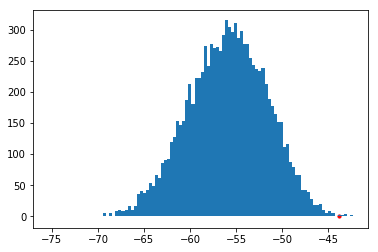

In [6]:
plt.hist(scores, bins=100)
plt.scatter(score(line1), 0, c='red', s=10)

In [7]:
score1 = score(line1)
for i in range(10000):
    if scores[i] >= score1:
        print(perms[i])
        

[10  8  4 13  6  8 11 11  8 10  8 11  4 15 11 15 14]
[10 14 15 15 11 11  8 13 10  8 11 11  4  6  8  4  8]
[ 8 13  6 14 11  8 11  8 10 10  4 15 15  4 11 11  8]
[10  8  4  8 15 15 11 11  8 11 10  4 11  8 14 13  6]
[10  4 11  8  6  8 13 15 15 14 10  4  8 11  8 11 11]
[ 6  4 15 14 15 11  4 11  8 13  8 10 10  8 11 11  8]
[10  4 15 11 11  8 13  8 11 14 15  4  8  6 10  8 11]
[10  8 11 11 11  4 11  8 10  4 15 14 15  8  6 13  8]
[10  8  4 14 15  8 10  8 11 15 11  8 13  6  4 11 11]
[15  8 15 11  4 11 10  8 10  8 11 11  8 14 13  6  4]


[11  8 11  8 10  4 10  8 11 11  8 13  6 15  4 14 15]
[15 11  8 11  8 10  4 10  8 11 11  8 13  6 15  4 14]
[14 15 11  8 11  8 10  4 10  8 11 11  8 13  6 15  4]
[ 4 14 15 11  8 11  8 10  4 10  8 11 11  8 13  6 15]
[15  4 14 15 11  8 11  8 10  4 10  8 11 11  8 13  6]
[ 6 15  4 14 15 11  8 11  8 10  4 10  8 11 11  8 13]
[13  6 15  4 14 15 11  8 11  8 10  4 10  8 11 11  8]
[ 8 13  6 15  4 14 15 11  8 11  8 10  4 10  8 11 11]
[11  8 13  6 15  4 14 15 11  8 11  8 10  4 10  8 11]
[11 11  8 13  6 15  4 14 15 11  8 11  8 10  4 10  8]
[ 8 11 11  8 13  6 15  4 14 15 11  8 11  8 10  4 10]
[10  8 11 11  8 13  6 15  4 14 15 11  8 11  8 10  4]
[ 4 10  8 11 11  8 13  6 15  4 14 15 11  8 11  8 10]
[10  4 10  8 11 11  8 13  6 15  4 14 15 11  8 11  8]
[ 8 10  4 10  8 11 11  8 13  6 15  4 14 15 11  8 11]
[11  8 10  4 10  8 11 11  8 13  6 15  4 14 15 11  8]
[-36.06089749954424, -36.62378126745209, -36.06718538723067, -36.18834403009205, -35.043040601240584, -35.907558189846235, -37.89353237453359, -36.89468

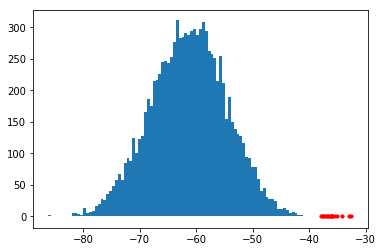

In [33]:
perms3 = []
scores3 = []
for _ in range(10000):
    perm = np.random.permutation(line1)
    perms3 += [perm]
    scores3 += [score(perm, gram=3)]
plt.hist(scores3, bins=100)

cycle_perm_score = []
for i in range(1,17):
    cycle = np.concatenate([line1[-i:], line1[:17-i]])
    print(cycle)
    cycle_perm_score += [score(cycle, gram=3)]
plt.scatter(cycle_perm_score, np.zeros(16), c='red', s=10)
print(cycle_perm_score)

low_bound = min(cycle_perm_score)
for i in range(10000):
    if scores3[i] >= low_bound:
        print(perms3[i])

In [6]:
import cvxpy
import numpy as np

# The data for the Knapsack problem
# P is total weight capacity of sack
# weights and utilities are also specified
P = 165
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

# The variable we are solving for
selection = cvxpy.Bool(len(weights))

# The sum of the weights should be less than or equal to P
weight_constraint = weights * selection <= P

# Our total utility is the sum of the item utilities
total_utility = utilities * selection

# We tell cvxpy that we want to maximize total utility 
# subject to weight_constraint. All constraints in 
# cvxpy must be passed as a list
knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [weight_constraint])

# Solving the problem
knapsack_problem.solve(solver=cvxpy.GLPK_MI)

309.0

In [5]:
selection.value

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]])